# Part II - How Trip Data Attributes and Features Affect Duration
## by Rahaf Bakeer



## Investigation Overview

>In this study I want to study what the affect of the data attributes that determine the value of the trip duration, and the attributes that will help with the study are the user_type, member_gender, member_birth_year, start_station (latitude,longitude) and end_station (latitude,longitude)





## Dataset Overview

> This data collection contains rider-specific information from a bike-sharing system serving the whole San Francisco Bay area. The dataset includes details on about 183,000 rides. Features include duration (measured in seconds) and other characteristics like gender, the user type (customer or subscriber), and date and time. The member's birth year, the names of the start and finish stations, the longitude and latitude of each station, and the unique IDs of each station provide further details.




| **Column Name**                | **Description**                                                |
|--------------------------------|----------------------------------------------------------------|
| `duration_sec`                  | Duration of the trip in seconds.                               |
| `start_time`                    | Start time of the trip.                                        |
| `end_time`                      | End time of the trip.                                          |
| `start_station_id`              | ID of the start station.                                      |
| `start_station_name`            | Name of the start station.                                    |
| `start_station_latitude`        | Latitude of the start station.                                |
| `start_station_longitude`       | Longitude of the start station.                               |
| `end_station_id`                | ID of the end station.                                        |
| `end_station_name`              | Name of the end station.                                      |
| `end_station_latitude`          | Latitude of the end station.                                  |
| `end_station_longitude`         | Longitude of the end station.                                 |
| `bike_id`                       | ID of the bike.                                                |
| `user_type`                     | Type of user (Customer or Subscriber).                        |
| `member_birth_year`             | Birth year of the member.                                     |
| `member_gender`                 | Gender of the member.                                         |
| `bike_share_for_all_trip`       | Indicates if the bike share program is for all trips.          |

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_data_df = pd.read_csv("./201902-fordgobike-tripdata.csv")

In [3]:
# Remove the missing values from the dataset
bike_data_df.dropna(inplace=True)

In [4]:
#Define a function to convert the types of the attributes
def convert_data_type(df,column_To_convert):
    for key,type in column_To_convert.items():
        df[key] = df[key].astype(type)

In [5]:
#Define the column that needed to convert the data type of them and then call convert_data_type function to convert them
column_To_convert={"member_birth_year":"int64","start_station_id":"int64","end_station_id":"int64","user_type":"category" ,"bike_share_for_all_trip":"bool"}
convert_data_type(bike_data_df,column_To_convert)

In [6]:
#Define a function to convert the data type to datetime
def convert_date_time_type(df,key):
    df[key]=pd.to_datetime(df[key])

In [7]:
#Call the function convert_date_time_type to convert the attributes ScheduledDay and AppointmentDay from object to datetime
convert_date_time_type(bike_data_df,"start_time")
convert_date_time_type(bike_data_df,"end_time")

##  Distribution of Trip Durations

> I will analyze the distribution of the duration_sec attribute that are the main feature

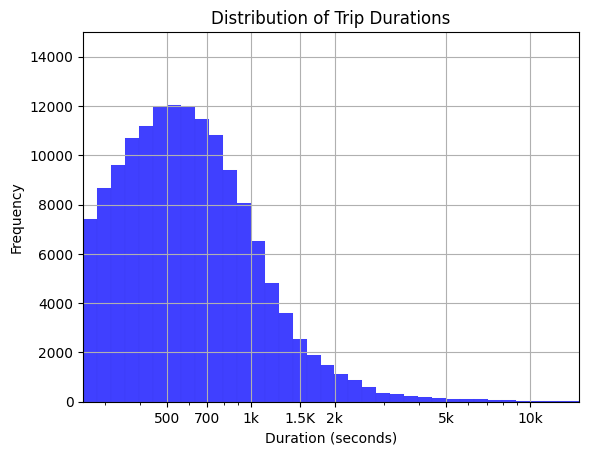

<Figure size 1000x1000 with 0 Axes>

In [8]:
bins = 10 ** np.arange(2.4, np.log10(bike_data_df['duration_sec'].max()) + 0.05, 0.05)

sb.histplot(bike_data_df['duration_sec'], bins=bins,  color='blue')
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.xscale('log')
plt.xticks([0,500, 700, 1e3,15e2, 2e3, 5e3, 1e4], [0,500,700, '1k','1.5K', '2k', '5k', '10k'])
plt.axis([0, 15000, 0, 15000])
plt.figure(figsize=[10, 10])

plt.show()


> This histogram represents the distribution of trip durations in a bike-sharing dataset. The x-axis shows the duration in seconds, while the y-axis represents the frequency of trips within each duration interval.

> The distribution of trip durations is right-skewed (positively skewed), meaning that most trips are of shorter durations, with a long tail extending toward longer trip times

> The peak of the distribution is around 500 to 700 seconds, indicating that most trips last between approximately 8 to 12 minutes.

> While the majority of trips are under 1,000 seconds, the histogram shows that some trips extend to much longer durations, up to 10,000 seconds.

> There are some outliers on the far right side of the histogram, indicating unusually long trip durations.

## Box Plot Distribution of trip durations in seconds for two user types



>  I will analyze the relationship between the two attributes user_type and trip duration

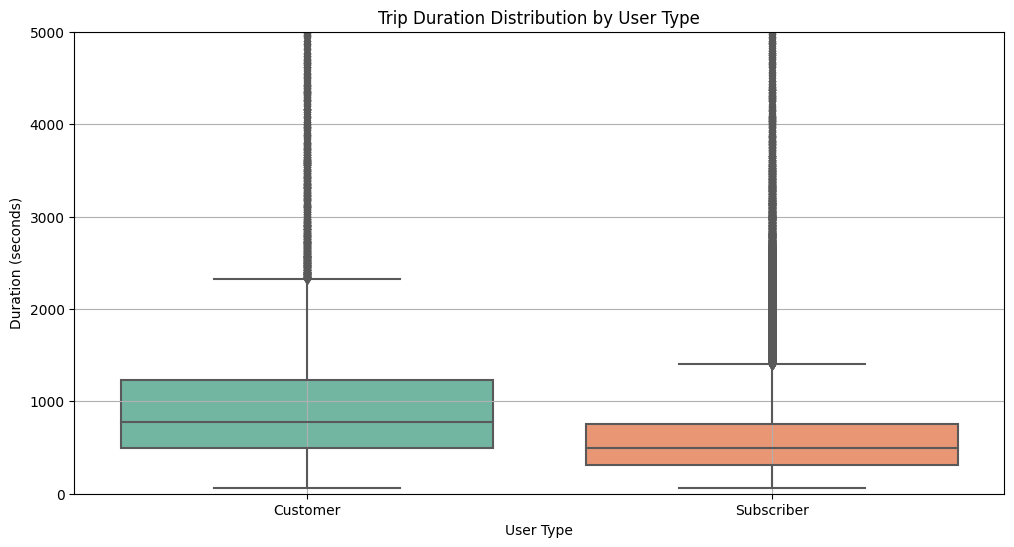

In [9]:
# Box Plot: Distribution of trip durations across different user types
plt.figure(figsize=(12, 6))
sb.boxplot(x='user_type', y='duration_sec', data=bike_data_df, palette='Set2')
plt.title('Trip Duration Distribution by User Type')
plt.xlabel('User Type')
plt.ylabel('Duration (seconds)')
plt.grid(True)
plt.ylim(0, 5000)  
plt.show()



> This box plot shows the distribution of trip durations in seconds for two user types: Customers and Subscribers. It compares the central tendency and spread of trip durations for each group, highlighting key differences in usage patterns.

- Customer
    - The green box represents the trip durations for Customers. The box (interquartile range, or IQR) shows that the middle 50% of customer trips last between approximately 500 and 1500 seconds. The median (the line inside the box) is around 1000 seconds. There are several outliers beyond 3000 seconds, indicating that some customers take much longer trips than the average.
    - Customers have a wider range of trip durations, with longer trips overall, and more variability in their usage.
  
- Subscriber
  - The orange box shows trip durations for Subscribers. The IQR for subscribers is tighter, with most trips falling between 300 and 800 seconds, showing that their trips tend to be shorter and more consistent. The median trip duration for subscribers is lower than for customers, around 600 seconds. There are also some outliers, but fewer extreme values compared to customer.
  - Subscribers' trip durations are shorter and more consistent, indicating a tendency for quicker, more frequent trips.


## Face plot Trip Duration, Gender, and Age

> I will examine the Face plot Trip Duration, Gender, and Age

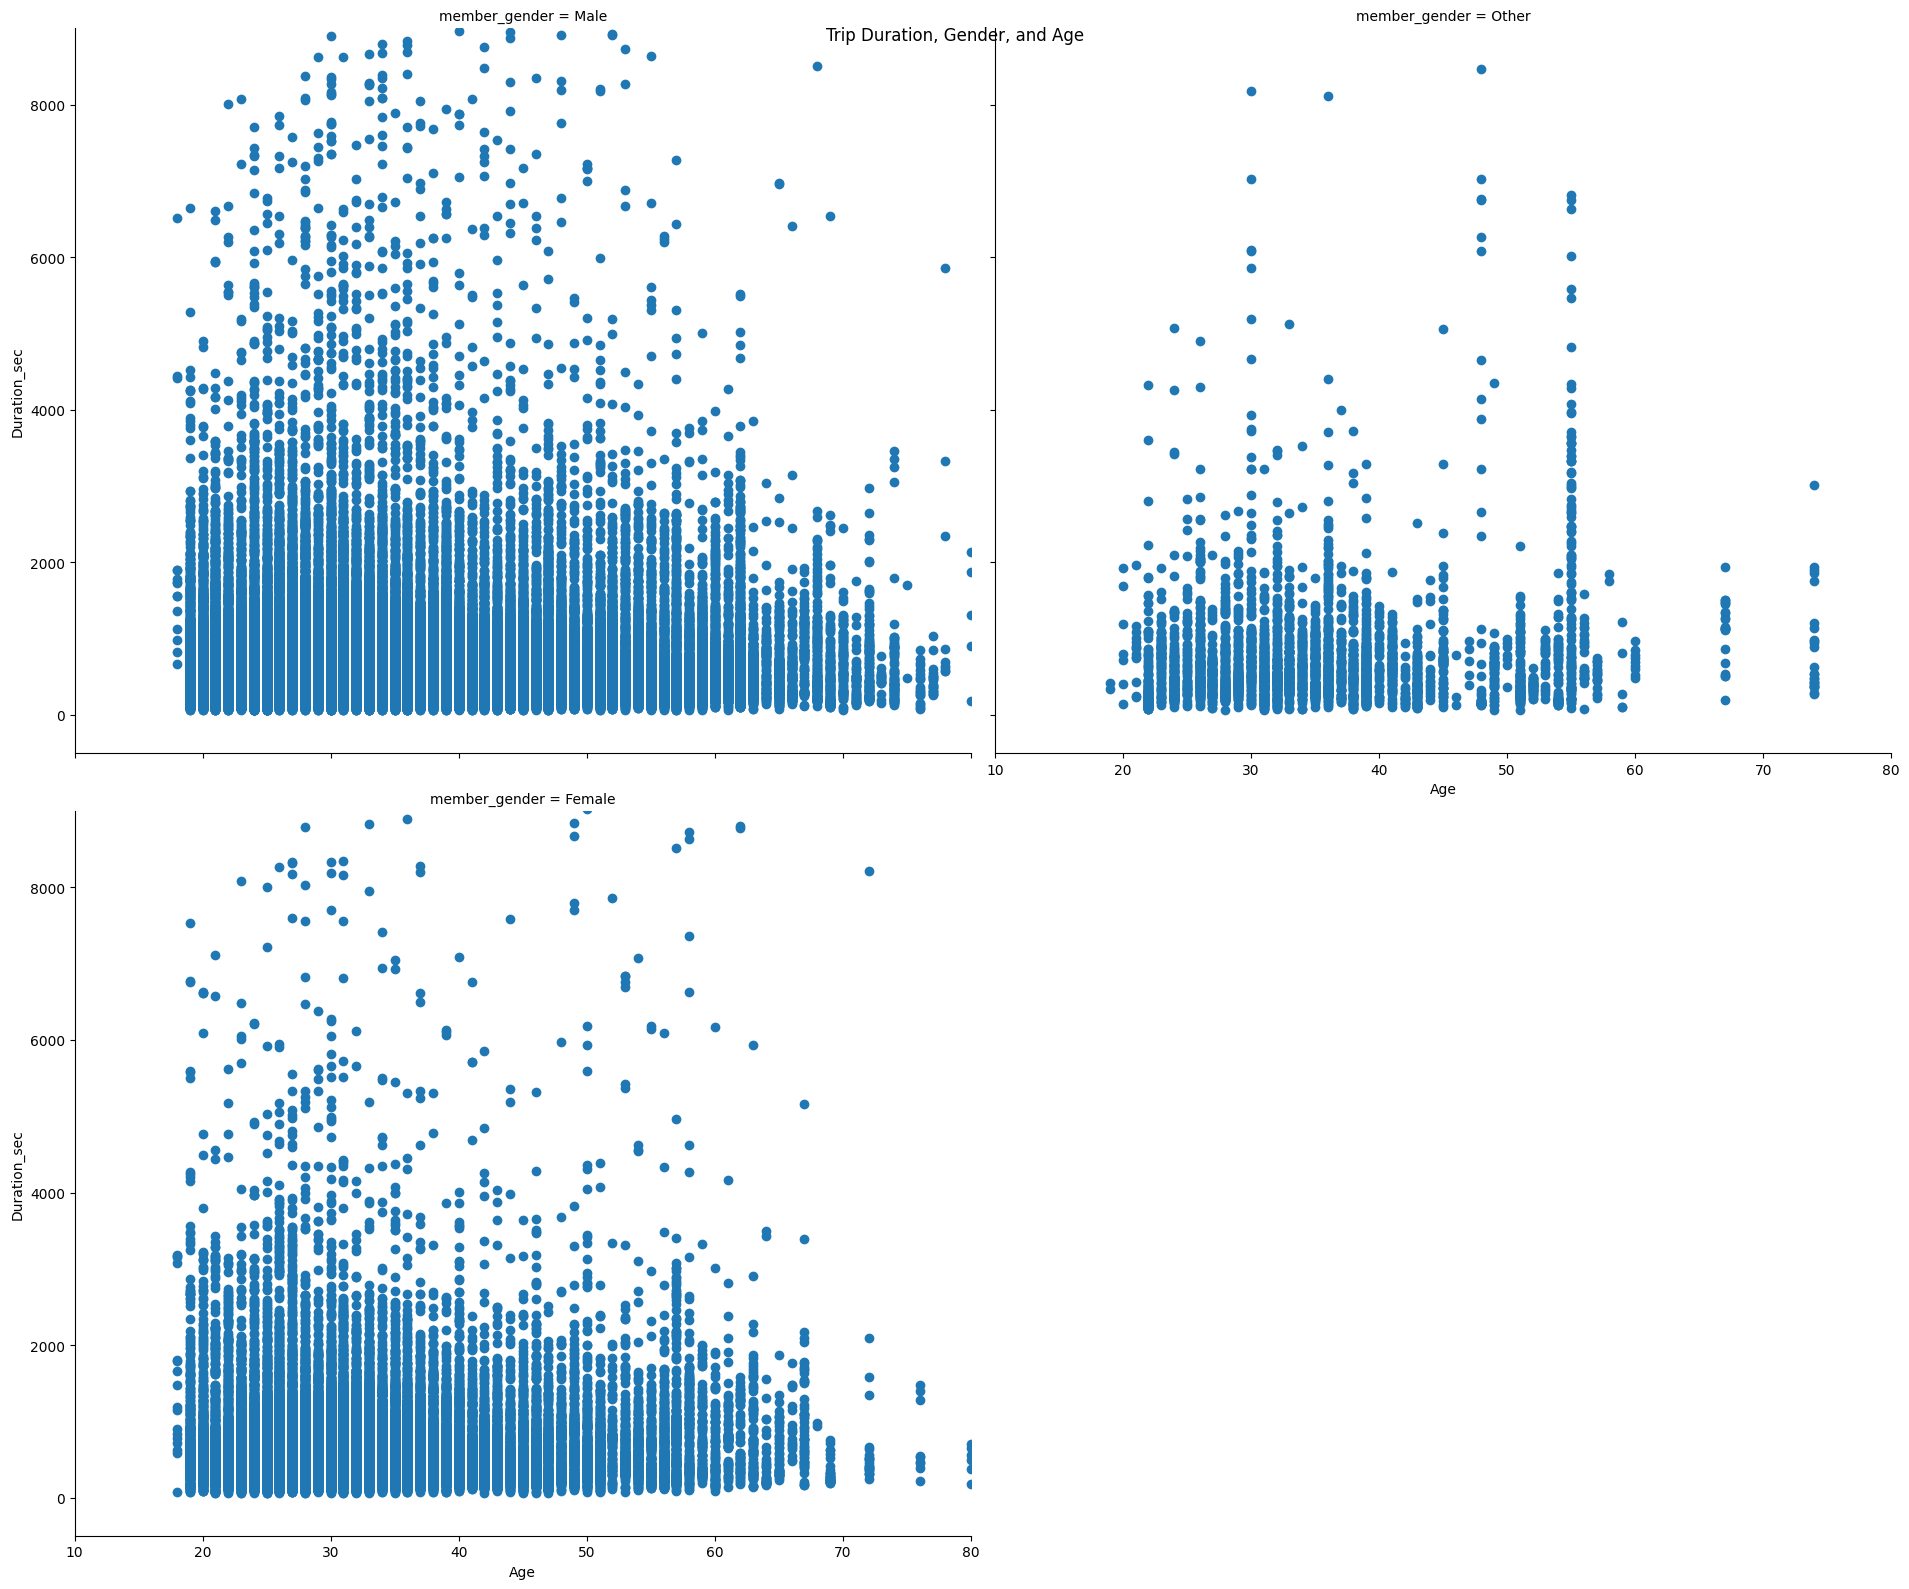

In [ ]:
#Plot the Face Plot for trip Duration, Gender, and Age
#Calculate the age by subtracting 2019 and the user year of birth
#the data set has been collected 2019 so that I used 2019
bike_data_df['age'] = (2019 - bike_data_df['member_birth_year'])
facePlot = sb.FacetGrid(data = bike_data_df, col = 'member_gender', col_wrap = 2,
                        height=8, aspect=1.2,
                 xlim = [10, 80], ylim = [-500, 9000])
facePlot.map(plt.scatter, 'age', 'duration_sec', alpha= 1)
facePlot.set_xlabels('Age')
facePlot.set_ylabels('Duration_sec')
facePlot.figure.suptitle('Trip Duration, Gender, and Age')

plt.show()

> The faceted scatter plot visualizes the relationship between trip duration (in seconds), gender, and age for a dataset. It shows that younger users, especially males, tend to have shorter trip durations, while older users and those who identify as "Other" or female exhibit a broader range of trip durations.

> X-Axis (Age): The horizontal axis represents the age of users, ranging from approximately 10 to 80 years.

> Y-Axis (Trip Duration): The vertical axis indicates the duration of trips in seconds, ranging from 0 to 10,000 seconds.


> Males: The plot shows that the majority of male users have a trip duration under 2,000 seconds.

> Females: Female users also exhibit shorter trip durations predominantly under 2,000 seconds. 


> Other: Users identifying as "Other" show the most diverse range of trip durations across all age groups.